<a href="https://colab.research.google.com/github/wiesehahn/waldmaske/blob/master/notebooks/query_osm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="ee-notebook-buttons" align="left">
    <td><a target="_blank"  href="https://github.com/wiesehahn/waldmaske/blob/master/notebooks/data_visualization.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td>
    <td><a target="_blank"  href="https://colab.research.google.com/github/wiesehahn/waldmaske/blob/master/notebooks/query_osm.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# OSM Data
Loading Data from OpenStreetMap with Python and the Overpass API

In [48]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
(
  way
  ["highway"]
  [highway!~"footway|path|bridleway|steps"]
  [tracktype!~"grade4|grade5"]
  (51.504442609479455,9.940686323657957,51.5633863622234,10.057416059986082);
);
out skel geom qt;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [49]:
import geojson

# adapted from https://github.com/yannforget/OSMxtract/blob/master/osmxtract/overpass.py
def as_linestrings(elements):
    """Parse an iterable of elements to retrieve a FeatureCollection of linestrings.
    Parameters
    ----------
    elements : list of dict
        JSON response elements.
    Returns
    -------
    feature_collection : dict
        Output GeoJSON FeatureCollection.
    """
    features = []
    elements = [e for e in elements if e.get('type') == 'way']
    for elem in elements:
        coords = [[node['lon'], node['lat']] for node in elem['geometry']]
        geom = geojson.LineString(coordinates=coords)
        features.append(geojson.Feature(elem['id'], geom))
    return geojson.FeatureCollection(features)
    
feature_collection = as_linestrings(data['elements'])

In [ ]:
import subprocess

try:
    import geopandas as gpd
except ImportError:
    print('geopandas package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geopandas'])
    import geopandas as gpd

In [50]:
# To GeoPandas GeoDataFrame:
geodataframe = gpd.GeoDataFrame.from_features(feature_collection)

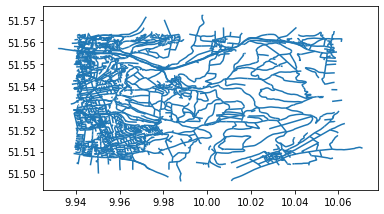

In [52]:
geodataframe.plot()